<h2><font color="#004D7F" size=6>Módulo 5. Fase de tratamiento de datos</font></h2>



<h1><font color="#004D7F" size=5>2.1. Feature Selection con datatos categóricos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías](#section11)
    * [1.2. CSV](#section12)
* [2. Prepración de los datos](#section2)
    * [2.1. Tipo de las variables](#section21)
    * [2.2. División para entrenamiento/validación](#section22)
* [3. Transformación de los datos](#section3)
    * [3.1. Codificación de train/test](#section31)
    * [3.2. Codificación del target](#section32)
    * [3.3. Codificación de todos los atributos](#section33)
* [4. Feature selection](#section4)
    * [4.1. Chi-cuadrada](#section41)
    * [4.2. Información Mutua](#section42)    
* [5. Fase de modelado](#section5)
    * [5.1. Resultados de linea base](#section51)
    * [5.2. Resultados con $\chi^{2}$](#section52) 
    * [5.3. Resultados con Información Mutua](#section53)  

In [ ]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

En resumen, feature selection, también llamado como selección de mejores características o atributos, es el proceso de seleccionar un subconjunto de características pertinentes (variables, predictores) para su uso en construcción de modelos. Las técnicas de feature selection son utilizadas por cuatro razones:
* Simplificación de modelos con el fin de hacerlas más sencillas de interpretar para los usuarios/investigadores.
* Menor tiempo de entrenamiento.
* Evitar la maldición de la dimensionalidad:
* Generalización realzada por reducir _overfitting_ (formalmente, reducción de varianza).

En este tutorial, descubrirá cómo realizar la selección de funciones con datos de entrada categóricos:
* El problema del modelado predictivo de _Breast Cancer_ con entradas categóricas y _target_ de clasificación binaria.
* Cómo evaluar la importancia de las características categóricas utilizando las estadísticas de chi-cuadrado e información mutua.
* Cómo realizar la selección de características para datos categóricos al ajustar y evaluar un modelo de clasificación.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías</font>

En primer lugar vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo de la sección.

In [88]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split

<a id="section12"></a>
## <font color="#004D7F"> 1.2. CSV</font>

En esta lección, el conjunto de datos clasifica los datos de pacientes con cáncer de mama como recurrencia o no recurrencia del cáncer. Hay 286 ejemplos y nueve características de entrada. Es un problema de clasificación binaria.

La información sobre este conjunto de datos la encontramos en [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer). Mirando los datos, podemos ver que las nueve variables de entrada son categóricas que están dadas entre comillas simples (**'**).


In [179]:
# Clasification problem
filename = 'data/breast-cancer.csv'
names = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiant', 'class']
df_cla = pd.read_csv(filename, names=names)
dataset = df_cla.values
X_cla = dataset[:, :-1]
Y_cla = dataset[:,-1]
#Y_cla

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Prepración de los datos</font>

Veamos en primera instancia los pasos que tenemos que realizar para poder trabajar nuestro conjunto de datos, para luego poder aplicarle Feature selection teniendo datos categóricos.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Tipo de las variables </font>

Lo primero que tenemos que asegurarnos es que las variables se encuentren en formato _String_ ya que para poder trabajarlo bien. En este conjunto de datos todas las variables se encuentran con datos categóricos. Aunque ya los teníamos como objeto vamos formatearlo de todas maneras.

In [180]:
print(X_cla)
# Convertimos todos los campos a String
# Además, con este truco podemos "camuflar" valores NaN que tenemos y así no nos dará error las conversiones
X_cla = X_cla.astype(str)

[["'40-49'" "'premeno'" "'15-19'" ... "'right'" "'left_up'" "'no'"]
 ["'50-59'" "'ge40'" "'15-19'" ... "'right'" "'central'" "'no'"]
 ["'50-59'" "'ge40'" "'35-39'" ... "'left'" "'left_low'" "'no'"]
 ...
 ["'30-39'" "'premeno'" "'30-34'" ... "'right'" "'right_up'" "'no'"]
 ["'50-59'" "'premeno'" "'15-19'" ... "'right'" "'left_low'" "'no'"]
 ["'50-59'" "'ge40'" "'40-44'" ... "'left'" "'right_up'" "'no'"]]


<a id="section22"></a>
## <font color="#004D7F"> 2.2. División para entrenamiento/validación </font>

Una vez cargados, podemos dividir los datos en conjuntos de entrenamiento y validación para que podamos ajustar y evaluar un modelo de aprendizaje. Utilizaremos la función `train_test_split()` y utilizaremos el 67% de los datos para el entrenamiento y el 33% para validación.

In [181]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cla, Y_cla, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Transformación de los datos</font>

Podemos usar la clase `OrdinalEncoder` de scikit-learn para codificar cada variable en enteros. Esta es una clase flexible y permite que el orden de las categorías se especifique como argumentos si se conoce dicho orden.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Más información en la documentación oficial sobre la clase [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html). 
</div> 

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Codificación de train/test </font>

La siguiente función llamada `prepare_inputs()` toma los datos de entrada para entrenamiento y validación y los codifica utilizando una codificación ordinal.

In [182]:
# prepare input data
from sklearn.preprocessing import OrdinalEncoder

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Codificación del _target_ </font>

También necesitamos preparar la variable _target_ (clase). Es un problema de clasificación binaria, por lo que debemos asignar las dos etiquetas de clase a 0 y 1. Este es un tipo de codificación ordinal, y scikit-learn proporciona la clase `LabelEncoder` específicamente diseñada para este propósito. Podríamos usar el `OrdinalEncoder` con la misma facilidad y lograr el mismo resultado, aunque `LabelEncoder` está diseñado para codificar una sola variable.

El entero de la función `prepare_targets()` codifica los datos de salida para entrenamiento/validación.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Más información en la documentación oficial sobre la clase [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). 
</div> 

In [183]:
# prepare target
from sklearn.preprocessing import LabelEncoder

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

<a id="section33"></a>
## <font color="#004D7F"> 3.3. Codificación de todos los atributos </font>

Una vez realizadas las funciones, podemos pasar, a cualés corresponda, los diferentes atributos de nuestro conjunto de datos

In [184]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

Ahora que hemos cargado y preparado el conjunto de datos, podemos explorar feature selection.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Feature selection</font>

Hay dos técnicas populares de selección de características que se pueden usar para datos de entrada categóricos y una variable objetivo categórica (clase):
* Prueba estadística Chi-Cuadrada ($\chi^{2}$).
* Prueba estadística de información mutua.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Chi-cuadrada</font>

La prueba de hipótesis estadística $\chi^{2}$ de Pearson es un ejemplo de una prueba de independencia entre variables categóricas. Los resultados de esta prueba se pueden utilizar para la selección de características, donde aquellas características que son independientes de la variable objetivo se pueden eliminar del conjunto de datos.

La biblioteca de máquina scikit-learn proporciona una implementación de la prueba de chi-cuadrado en la función `chi2()`. Esta función se puede utilizar en una estrategia de selección de características, como seleccionar las _k_ características más relevantes (valores más grandes) a través de la clase `SelectKBest`.

Vamos a definir la clase `SelectKBest` para usar la función `chi2()` y seleccionar todas las características, luego transformar los datos de train/test.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Más información en la documentación oficial sobre la función [`chi2()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html). 
</div> 

In [79]:
# Chi-cuadrado
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features_chi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Luego podemos imprimir los puntajes para cada variable (más grande es mejor), y trazar los puntajes para cada variable como un gráfico de barras para tener una idea de cuántas características debemos seleccionar.

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


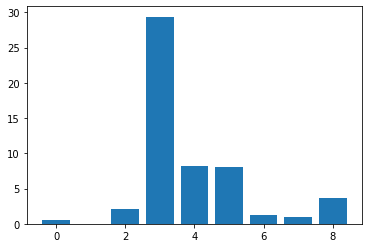

In [80]:
X_train_fs_chi, X_test_fs_chi, fs_chi = select_features_chi(X_train_enc, y_train_enc, X_test_enc)
# Mostramos los scores
for i in range(len(fs_chi.scores_)):
    print('Feature %d: %f' % (i, fs_chi.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs_chi.scores_))], fs_chi.scores_)
pyplot.show()

En este caso, podemos ver que los puntajes son pequeños y es difícil hacerse una idea del número solo sobre qué características son más relevantes. Quizás las características 3, 4, 5 y 8 son las más relevantes.

Podríamos establecer k = 4 al configurar `SelectKBest` para seleccionar estas cuatro características principales.

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Información Mutua</font>

La información mutua del campo de la teoría de la información es la aplicación de la ganancia de información (típicamente utilizada en la construcción de árboles de decisión) para presentar la selección. La información mutua se calcula entre dos variables y mide la reducción de la incertidumbre para una variable dado un valor conocido de la otra variable.

Scikit-learn proporciona una implementación de información mutua para la selección de características a través de la función `mutual_info_classif()`.

Al igual que `chi2()`, se puede usar en la estrategia de selección de características `SelectKBest` (y otras estrategias).

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Más información en la documentación oficial sobre la función [`mutual_info_classif()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html). 
</div> 

In [71]:
# Chi-cuadrado
from sklearn.feature_selection import mutual_info_classif
# feature selection
def select_features_mi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Podemos realizar la selección de características utilizando información mutua sobre el conjunto de cáncer de mama e imprimir y trazar los puntajes (más grande es mejor) como lo hicimos en la sección anterior.

Feature 0: 0.058748
Feature 1: 0.035770
Feature 2: 0.085922
Feature 3: 0.090771
Feature 4: 0.054822
Feature 5: 0.003469
Feature 6: 0.000000
Feature 7: 0.007673
Feature 8: 0.000000


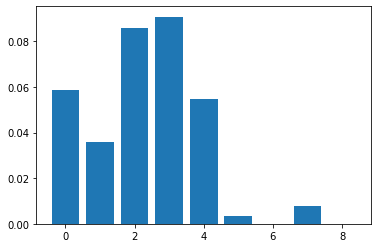

In [81]:
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features_mi(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs_mi.scores_)):
    print('Feature %d: %f' % (i, fs_mi.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs_mi.scores_))], fs_mi.scores_)
pyplot.show()

En este caso, podemos ver que algunas de las características tienen una puntuación muy baja, lo que sugiere que tal vez puedan eliminarse. Quizás las características 3, 6, 2 y 5 son las más relevantes.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section5"></a>
# <font color="#004D7F"> 5. Fase de modelado</font>

Existen muchas técnicas diferentes para calificar características y seleccionar características basadas en puntajes; ¿Cómo sabes cuál usar? Un enfoque sólido es evaluar modelos utilizando diferentes métodos de selección de características (y número de características) y seleccionar el método que resulte en un modelo con el mejor rendimiento.

En esta sección, evaluaremos un modelo de Regresión logística con todas las características en comparación con un modelo construido a partir de características seleccionadas por chi-cuadrado y aquellas características seleccionadas mediante información mutua. La regresión logística es un buen modelo para probar métodos de selección de características, ya que puede funcionar mejor si se eliminan características irrelevantes del modelo.

<a id="section51"></a>
## <font color="#004D7F"> 5.1. Resultados de linea base</font>

Lo primero es verificar si el modelo mejora realmente con determinadas características seleccionadas. Para ello tenemos que sacar el resultado con todas las características.

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(f"Accuracy: {accuracy*100:,.2f}%")

Accuracy: 75.79%


<a id="section52"></a>
## <font color="#004D7F"> 5.2. Resultados con $\chi^{2}$</font>

En el caso de $\chi^{2}$ determinamos que había 4 características importantes, por tanto modificaremos la función para seleccionar estas 4 características (`k=4`). Una vez modificadas podemos ver el resultado final

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features_chi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4) # cambiamos 
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

# feature selection
X_train_fs_chi, X_test_fs_chi = select_features_chi(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs_chi, y_train_enc)
# evaluate the model
yhat_chi = model.predict(X_test_fs_chi)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat_chi)
print(f"Accuracy: {accuracy*100:,.2f}%")

Accuracy: 74.74%


En este caso podemos ver que hemos obtenido un rendimiento pero que con las características originales.

<a id="section53"></a>
## <font color="#004D7F"> 5.3. Resultados con Información Mutua</font>

En el caso de Información Mútua también había determinadas 4 características importantes, por tanto modificaremos la función para seleccionar estas 4 características (`k=4`). Una vez modificadas podemos ver el resultado final

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features_mi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

# feature selection
X_train_fs_mi, X_test_fs_mi = select_features_mi(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs', random_state=7)
model.fit(X_train_fs_mi, y_train_enc)
# evaluate the model
yhat_mi = model.predict(X_test_fs_mi)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat_mi)
print(f"Accuracy: {accuracy*100:,.2f}%")

Accuracy: 77.89%


En este caso podemos ver que hemos obtenido un rendimiento mayor que con las características original, aunque al no haber utilizado una validación cruzada si ejecutamos varias veces podemos ver que cambia mucho los valores. Deberemos realizar con un KFold para asegurarnos de los resultados.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>